### Regresión Lineal

- Una regresión busca una función que reduzca al máximo el Error Cuadrático Medio: Epsilon(Y hat - y real)**2/n
- Para encontrar esa función, necesito encontrar los parámetros que reducen el máximo ese RMSE.
- Los parámetros que debo encontrar son: b (la ordenada al orígen (dónde la recta cruza el eje “y”) y m (la pendiente). y= b+mx
- Sabiendo el valor de x, y el valor de m, yo puedo calcular Y.


###Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###Generar dataset

    x   y
0  20  40
1  25  45
2  32  60
3  12  32
4  41  90
5  10  21


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

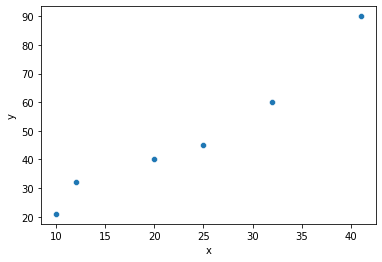

In [2]:
dat = {"x": [20,25,32,12,41,10], "y": [40,45,60,32,90,21]}
df = pd.DataFrame(dat)
print(df)
sns.scatterplot(df.x, df.y)

### Ecuacion linea recta

<AxesSubplot:xlabel='x', ylabel='y'>

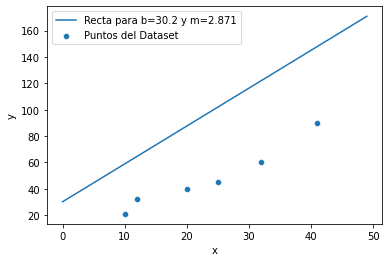

In [3]:
b = 30.2 #@param {type:"slider", min:-20, max:50, step:0.1}
m = 2.871 #@param {type:"slider", min:-10, max:10, step:0.001}

x_ = range(0,50)
y_ = [b + m*x for x in x_]

sns.lineplot(x= x_ , y= y_ , label="Recta para b={} y m={}".format(b, m)) ##GRAFICO DE LA LINEA RECTA
sns.scatterplot(x= df.x, y= df.y, label="Puntos del Dataset") ##GRAFICO DE LOS DATOS

### Búsqueda la función por ensayo y error:

- Esto significa comenzar a probar parámetros para b y m, y veo con cuál voy teniendo un menor RMSE.
- Primero comienzo a probar todos los valores de m y b.

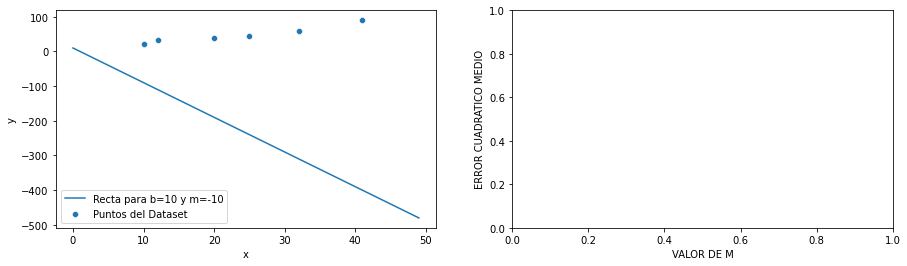


MSE: 90601.667
M nueva= -10.000


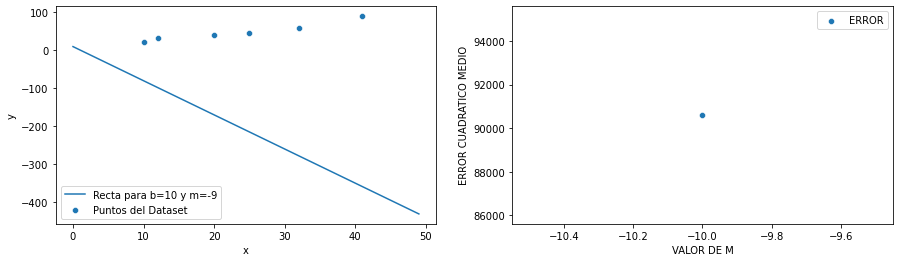


MSE: 75774.333
M nueva= -9.000


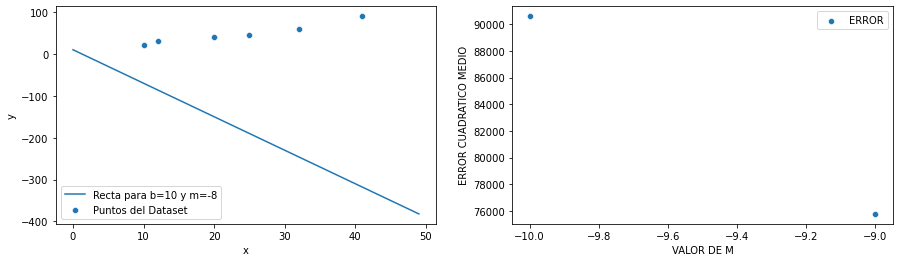


MSE: 62271.667
M nueva= -8.000


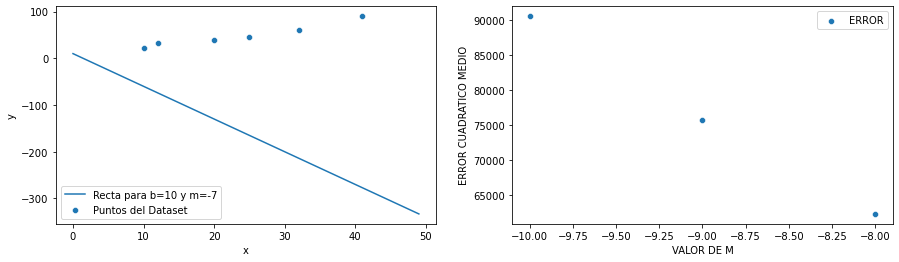


MSE: 50093.667
M nueva= -7.000


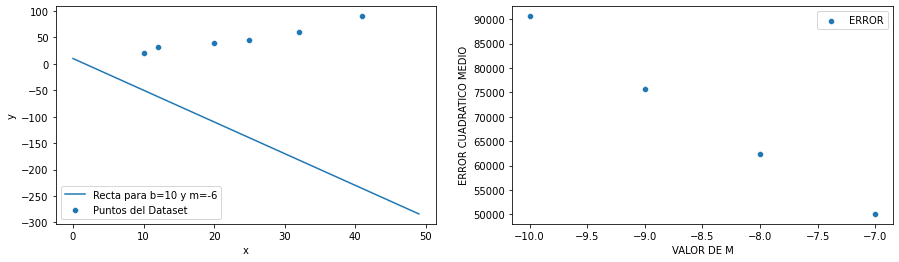


MSE: 39240.333
M nueva= -6.000


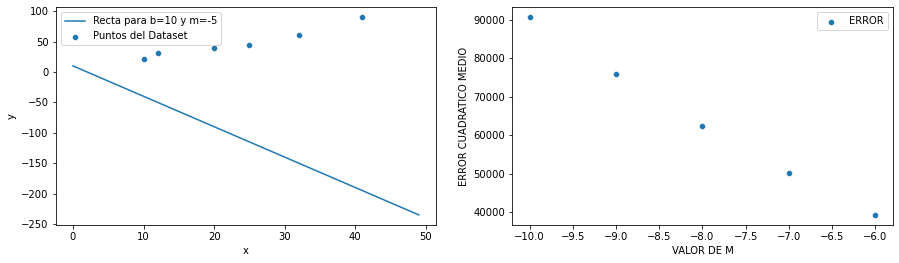


MSE: 29711.667
M nueva= -5.000


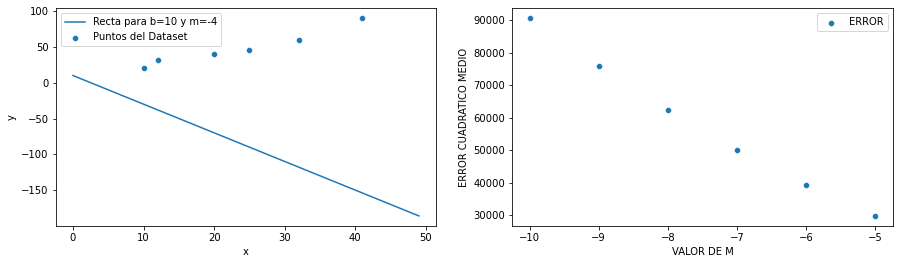


MSE: 21507.667
M nueva= -4.000


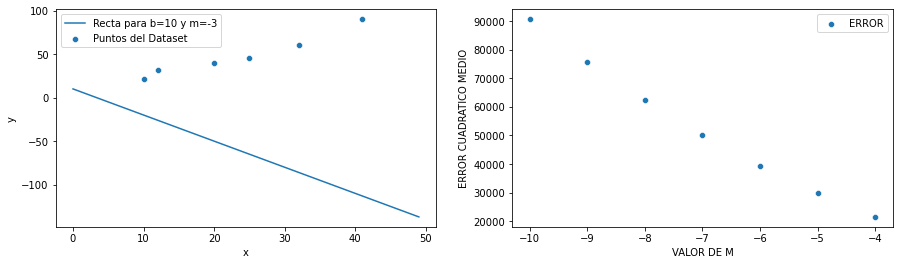


MSE: 14628.333
M nueva= -3.000


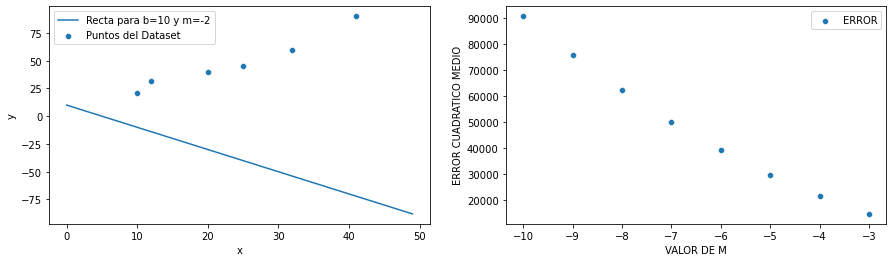


MSE: 9073.667
M nueva= -2.000


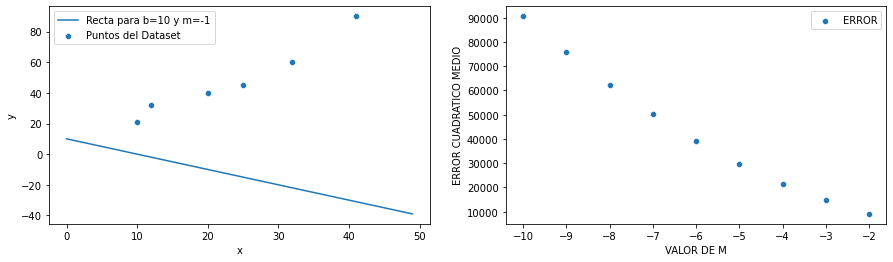


MSE: 4843.667
M nueva= -1.000


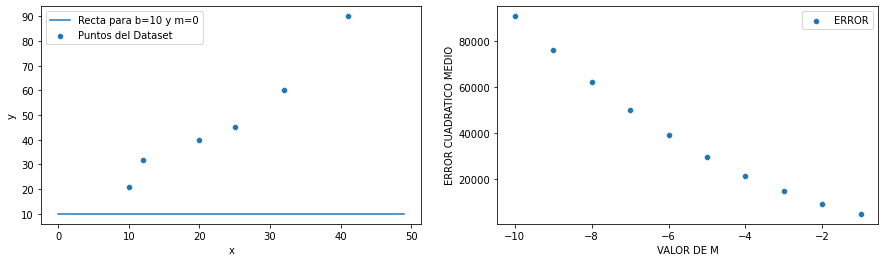


MSE: 1938.333
M nueva= 0.000


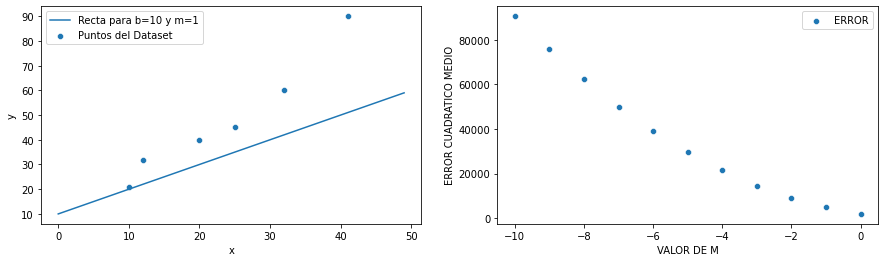


MSE: 357.667
M nueva= 1.000


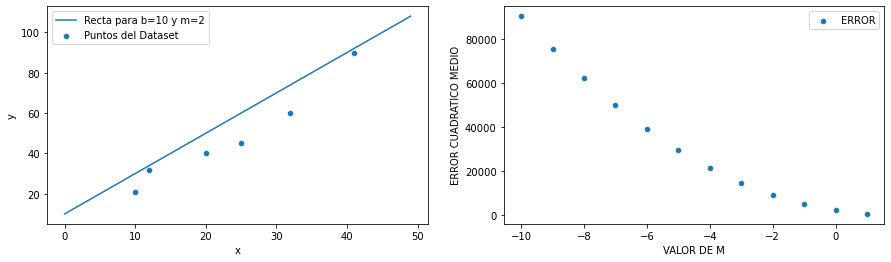


MSE: 101.667
M nueva= 2.000


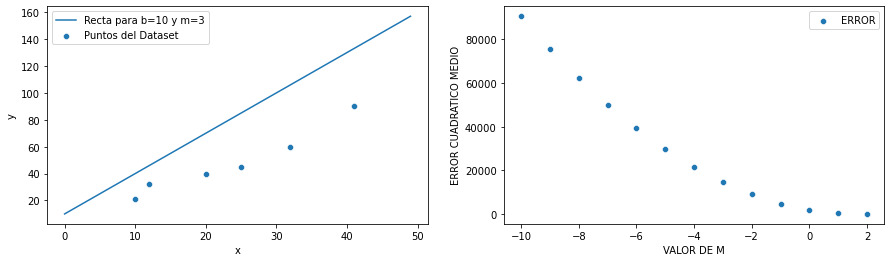


MSE: 1170.333
M nueva= 3.000


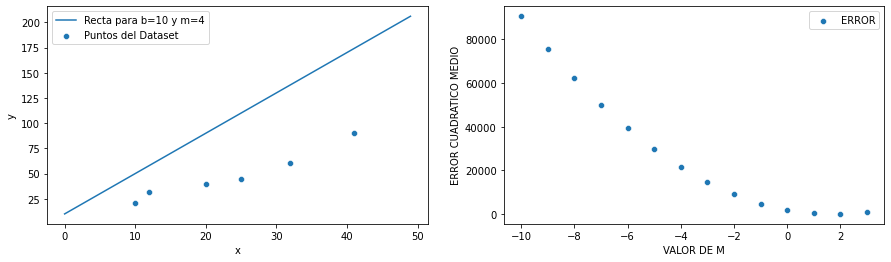


MSE: 3563.667
M nueva= 4.000


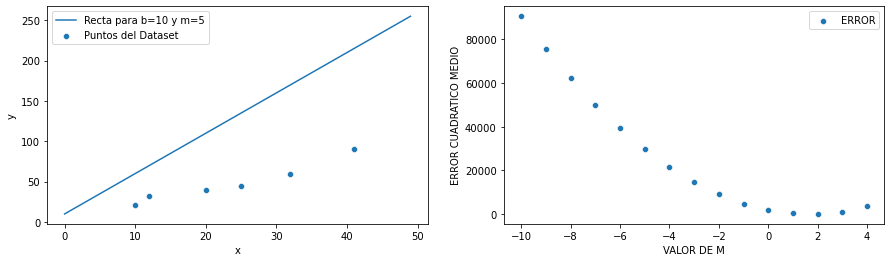


MSE: 7281.667
M nueva= 5.000


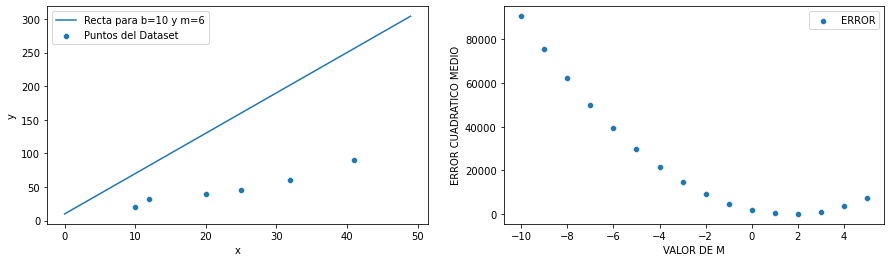


MSE: 12324.333
M nueva= 6.000


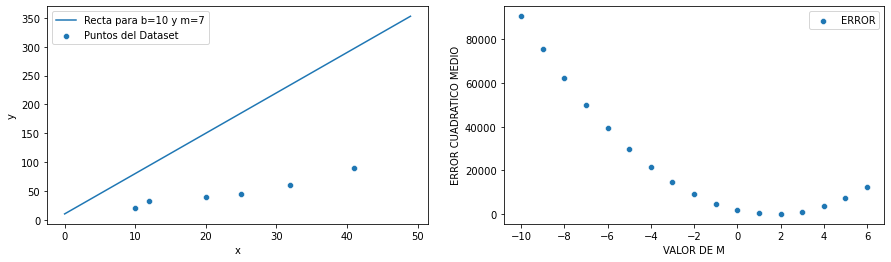


MSE: 18691.667
M nueva= 7.000


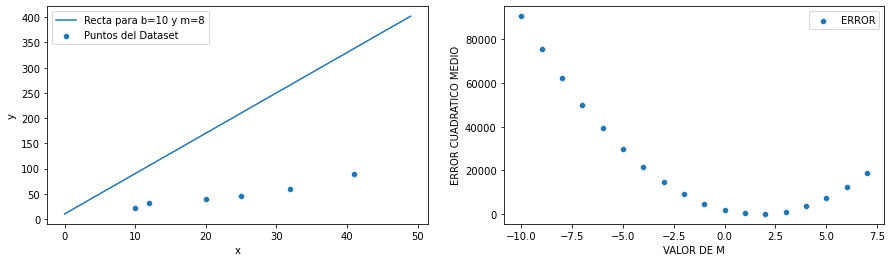


MSE: 26383.667
M nueva= 8.000


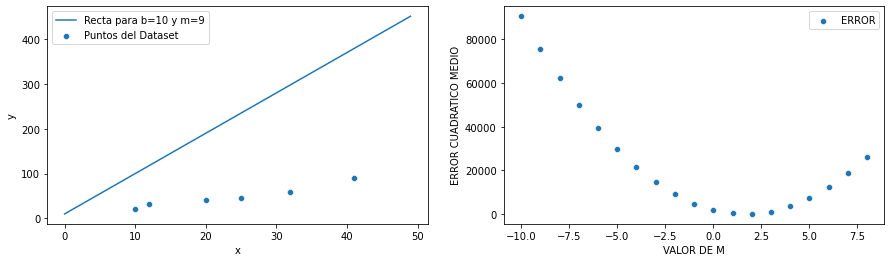


MSE: 35400.333
M nueva= 9.000


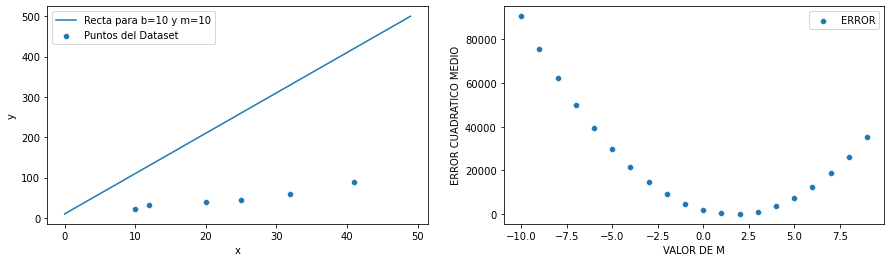


MSE: 45741.667
M nueva= 10.000


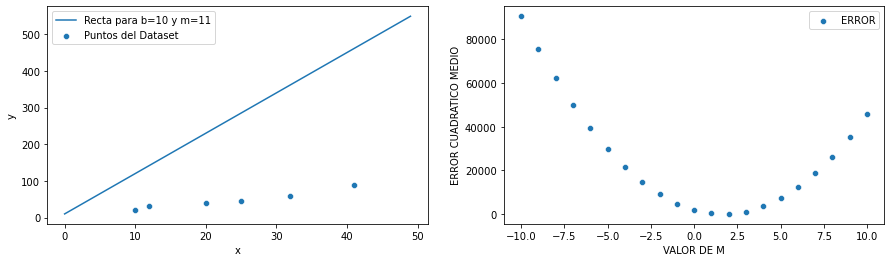


MSE: 57407.667
M nueva= 11.000


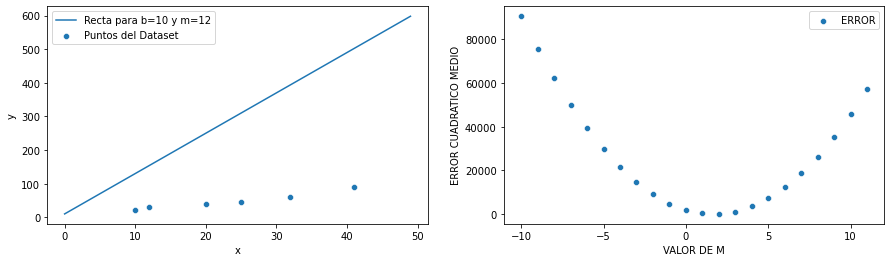


MSE: 70398.333
M nueva= 12.000


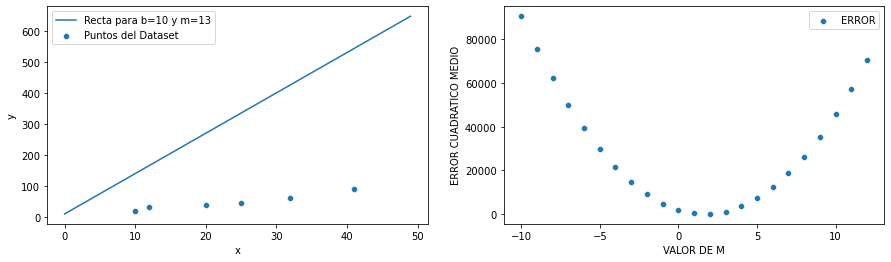


MSE: 84713.667
M nueva= 13.000


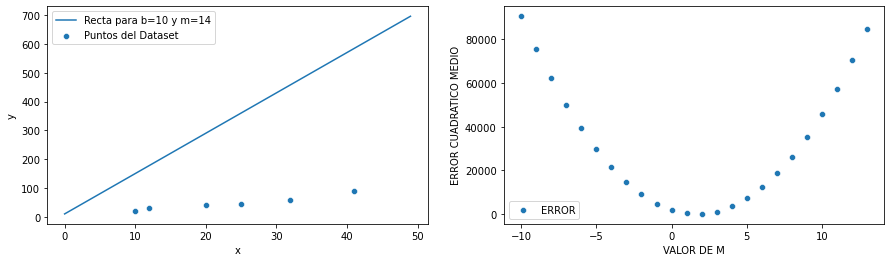


MSE: 100353.667
M nueva= 14.000


In [4]:
MSEs = []
Ms = []
b= 10
for m in range(-10,15):
  x_ = range(0,50)
  y_ = [b + m*x for x in x_]
    
#Visualizacion
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  sns.lineplot(x= x_ , y= y_ , label="Recta para b={} y m={}".format(b, m)) ##GRAFICO DE LA LINEA RECTA
  sns.scatterplot(x= df.x, y= df.y, label="Puntos del Dataset") ##GRAFICO DE LOS DATOS
  plt.subplot(1,2,2)
  ax = sns.scatterplot(x= Ms, y= MSEs, label="ERROR", legend="full") ##GRAFICO DEL ERROR
  ax.set(xlabel='VALOR DE M', ylabel='ERROR CUADRATICO MEDIO')
  plt.show()
  
#Calcular el error
  df["prediccion"] = (df.x*m) + b 
  df["error"] = (df.y - df.prediccion)**2/df.shape[0]  ##ECUACION DEL ERROR CUADRATICO
  mse = df.error.sum()
  MSEs.append(mse)
  Ms.append(m)
  print("\nMSE: {:.3f}".format(mse))
  print("M nueva= {:.3f}".format(m))

###REGRESION LINEAL

In [ ]:
MSEs = []
Ms = []
alfa = 0.01

#Ecuacion Linea recta: y = b + mx

b = 10 #@param {type:"slider", min:-20, max:50, step:0.1}
m = 5 #@param {type:"slider", min:-10, max:10, step:0.001}


MSE: 41.201
1.6348491384674504 0.5492996159019097
M nueva= 1.635


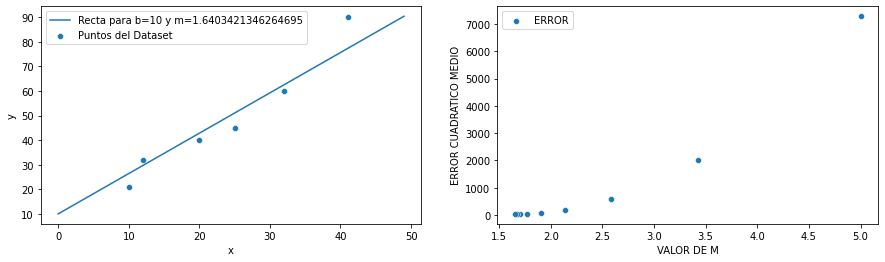

In [ ]:
x_ = range(0,50)
y_ = [b + m*x for x in x_]
#Visualizacion
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(x= x_ , y= y_ , label="Recta para b={} y m={}".format(b, m)) ##GRAFICO DE LA LINEA RECTA
sns.scatterplot(x= df.x, y= df.y, label="Puntos del Dataset") ##GRAFICO DE LOS DATOS
plt.subplot(1,2,2)
ax = sns.scatterplot(x= Ms, y= MSEs, label="ERROR", legend="full") ##GRAFICO DEL ERROR
ax.set(xlabel='VALOR DE M', ylabel='ERROR CUADRATICO MEDIO')

##Calcular el error
df["prediccion"] = (df.x*m) + b 
df["error"] = (df.y - df.prediccion)**2/df.shape[0]  ##ECUACION DEL ERROR CUADRATICO
mse = df.error.sum()
MSEs.append(mse)
Ms.append(m)
print("\nMSE: {:.3f}".format(mse))
derivada = 2/df.shape[0] * (df.prediccion - df.y).sum() #CALCULO DE LA DERIVADA DEL MSE
m = m - alfa*derivada
print(m, derivada)
print("M nueva= {:.3f}".format(m))

### Búsqueda por Descenso de gradiente

In [ ]:
##Funcion convexa
eje_x = range(-10,10)
eje_y = [x*x for x in eje_x] #Funcion Y = X^2

derivada = 0
valor = +5
alfa = 0.1

Pendiente en 0.8389 = 1.6777


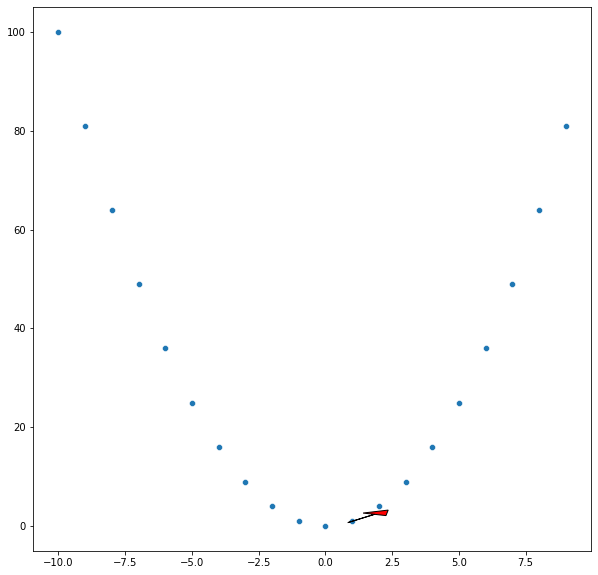

In [ ]:
#Hallar la derivada en un punto dado
derivada = 2 * valor #Ecuacion de la derivada
print("Pendiente en {:.4f} = {:.4f}".format(valor, derivada))

##Graficar funcion
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = eje_x, y= eje_y) #Grafica la funcion desde -10 a 10
plt.arrow(valor, valor**2, 1, derivada, head_width=1, head_length=1, fc='r') #Grafica la derivada (Simulado)

#Aplicar la derivada para minimizar la funcion
valor = valor - alfa*derivada

###Descenso de gradiente aplicado a la regresion lineal

In [ ]:
derivada = 2/df.shape[0] * (df.prediccion - df.y).sum() #CALCULO DE LA DERIVADA DEL MSE
m = m - alfa*derivada
print("M nueva= {:.3f}".format(m))

M nueva= 1.759


###Regularizacion
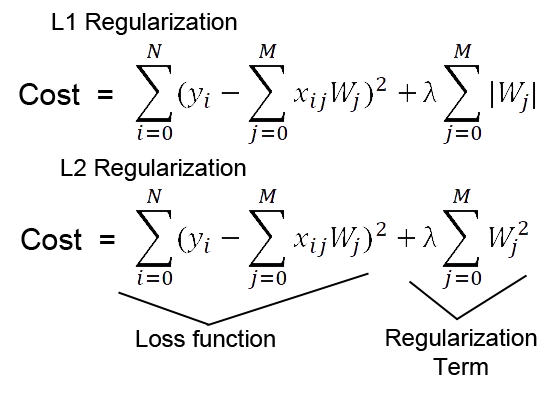

###Regresion Logistica

In [ ]:
###Funcion Sigmoide o logistica
from math import e, log

x = list(range(-20,20))
y = [1/(1+e**((z)*-1)) for z in x]
h = np.log(y)
ax = sns.scatterplot(x=x, y = y)
ax.set(xlabel="X", ylabel="Funcion sigmoide")

In [ ]:
log(0.9)*-1